In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


LIBRARIES

In [2]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/NLP END SEM/'

# Kannada Dataset Abusive

In [4]:
train_data = pd.read_csv(folder_path + "kannada_offensive_train.csv",delimiter='\t',header = None, on_bad_lines='skip')
valid_data = pd.read_csv(folder_path + "kannada_offensive_dev.csv",delimiter='\t',header = None, on_bad_lines='skip')
test_data = pd.read_csv(folder_path + "kannada_offensive_test.csv",delimiter='\t',header = None, on_bad_lines='skip')

In [5]:
train_data = train_data.rename(columns={0:'text',1:'label'})
valid_data = valid_data.rename(columns={0:'text',1:'label'})
test_data = test_data.rename(columns={0:'text'})

In [6]:
train_data['label'].value_counts()

Not_offensive                           3543
not-Kannada                             1521
Offensive_Targeted_Insult_Individual     487
Offensive_Targeted_Insult_Group          329
Offensive_Untargetede                    212
Offensive_Targeted_Insult_Other          123
Name: label, dtype: int64

In [7]:
valid_data['label'].value_counts()

Not_offensive                           426
not-Kannada                             191
Offensive_Targeted_Insult_Individual     66
Offensive_Targeted_Insult_Group          44
Offensive_Untargetede                    33
Offensive_Targeted_Insult_Other          16
Name: label, dtype: int64

In [8]:
train_data['enc_label'] = train_data['label'].replace({'Not_offensive':0, 'not-Kannada':1,'Offensive_Targeted_Insult_Individual':2
                                                       ,'Offensive_Untargetede':3,'Offensive_Targeted_Insult_Group':4,
                                                       'Offensive_Targeted_Insult_Other':5
                                                       })
valid_data['enc_label'] = valid_data['label'].replace({'Not_offensive':0, 'not-Kannada':1,'Offensive_Targeted_Insult_Individual':2
                                                       ,'Offensive_Untargetede':3,'Offensive_Targeted_Insult_Group':4,
                                                       'Offensive_Targeted_Insult_Other':5
                                                       })

In [9]:
train_data

,text,label,enc_label
0,Tik tok alli jagala madtidralla adra baggenu o...,Not_offensive,0
1,Anyone from kerala here,not-Kannada,1
2,Movie rerelease madi plss,Not_offensive,0
3,Amazon prime alli bittidira....yella manele no...,Not_offensive,0
4,Guru sure news nanu tik tok dawn lod madeda ya...,Not_offensive,0
...,...,...,...
6210,@Gajendra hv neen en maadirodu mele,Offensive_Targeted_Insult_Individual,2
6211,Sir neev adthidda game yavdu,Not_offensive,0
6212,Dubb Full movie in telugu,Not_offensive,0
6213,Mostly nimma mate keli tic tok ban agirbeku ಅಣ...,Not_offensive,0


In [10]:
train_data['text'].tolist()

['Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira',
 'Anyone from kerala here',
 'Movie rerelease madi plss',
 'Amazon prime alli bittidira....yella manele nodtare....',
 'Guru sure news nanu tik tok dawn lod madeda yavaga nama nDudu tindu nama dashda mala uddha madaka bandro avaga deleted',
 'ಸುದೀಪ್ ಸರ್ ಅಂಡ್ ದರ್ಶನ್ ಸರ್ ಅವರಿಗೆ ಇರೋ ಫ್ಯಾನ್ಸ್ ಫಾಲೋಯಿಂಗ್ ರಕ್ಷಿತ್ ಶೆಟ್ಟಿ ಇಲ್ಲ ಅಂದ್ರು ಸಾಂಗ್ 2m  ಮತ್ತು ಟೀಸರ್ 8.5.m ಬೆಂಕಿ ಗುರು ಮೂವಿ  ವೇಟಿಂಗ್',
 'Ade old same story',
 'Superb rakshit sir sobg superb macking',
 'Hai Neel (prithvi) wonderful movie dia',
 'ಏನ್ ಗುರು ನಿನ್ನ ಚರಿತ್ರೆ ಸೃಷ್ಟಿಸುವ ಅವತಾರ ತುಂಬಾ ಚೆನ್ನಾಗಿ ಇದೆ ರಶ್ಮಿಕಾಗೆ ತುಂಬಾ ಉರುಸು',
 'E tara film ge ella kaitaididdu.... Welcooome..... Item song iro',
 'Super  guru 🥰',
 'Different aagide song... n',
 'D BOOS FANS ALL THE BEST',
 'ನಿಜವಾಗಿಯೂ  ಅದ್ಭುತ heartly heltidini... plz avrigella namma nimmellara supprt beku',
 "I'm speechless",
 'Movie was amazing!!🤩🤩',
 'BLACK HEART ala',
 'ಬ್ರೋ ಅವರು ಗೆ ದೇಶದ ಬಗ್ಗೆ ಅಭಿಮಾನ ಇಲ್

In [11]:
train_data['enc_label'].value_counts()

0    3543
1    1521
2     487
4     329
3     212
5     123
Name: enc_label, dtype: int64

In [12]:
valid_data['enc_label'].value_counts()

0    426
1    191
2     66
4     44
3     33
5     16
Name: enc_label, dtype: int64

In [13]:
print("Size of the training data ==> ", train_data.shape)
print("Size of the validation data ==>", valid_data.shape)
print("Size of the Test data ==>", test_data.shape)

Size of the training data ==>  (6215, 3)
Size of the validation data ==> (776, 3)
Size of the Test data ==> (777, 2)


One Hot Encoding

In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [15]:
encoder=OneHotEncoder(sparse=False)

encoded_labels = pd.DataFrame (encoder.fit_transform(train_data[['label']]))

encoded_labels .columns = encoder.get_feature_names_out(['label'])

train_data= pd.concat([train_data, encoded_labels ], axis=1)

In [16]:
train_data.columns

Index(['text', 'label', 'enc_label', 'label_Not_offensive',
       'label_Offensive_Targeted_Insult_Group',
       'label_Offensive_Targeted_Insult_Individual',
       'label_Offensive_Targeted_Insult_Other', 'label_Offensive_Untargetede',
       'label_not-Kannada'],
      dtype='object')

In [17]:
train_data = train_data.rename(columns={'label_Not_offensive':'Not_offensive','label_Offensive_Targeted_Insult_Group':'Offensive_Targeted_Insult_Group',
                                        'label_Offensive_Targeted_Insult_Individual':'Offensive_Targeted_Insult_Individual',
                                        'label_Offensive_Targeted_Insult_Other':'Offensive_Targeted_Insult_Other',
                                        'label_Offensive_Untargetede':'Offensive_Untargetede',
                                        'label_not-Kannada':'not-Kannada'})
train_data

,text,label,enc_label,Not_offensive,Offensive_Targeted_Insult_Group,Offensive_Targeted_Insult_Individual,Offensive_Targeted_Insult_Other,Offensive_Untargetede,not-Kannada
0,Tik tok alli jagala madtidralla adra baggenu o...,Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0
1,Anyone from kerala here,not-Kannada,1,0.0,0.0,0.0,0.0,0.0,1.0
2,Movie rerelease madi plss,Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0
3,Amazon prime alli bittidira....yella manele no...,Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0
4,Guru sure news nanu tik tok dawn lod madeda ya...,Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6210,@Gajendra hv neen en maadirodu mele,Offensive_Targeted_Insult_Individual,2,0.0,0.0,1.0,0.0,0.0,0.0
6211,Sir neev adthidda game yavdu,Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0
6212,Dubb Full movie in telugu,Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0
6213,Mostly nimma mate keli tic tok ban agirbeku ಅಣ...,Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
'''
Text Cleaning
'''
def text_cleaning(row):
  # to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = post.replace('—', ' ')
  # to remove accented characters
  new_text = unicodedata.normalize('NFKD', post).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  # to remove special characters and numbers
  # define the pattern to keep
  #pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
  #text = re.sub(pat, '', new_text)
  #to remove punctuation
  text = ''.join([c for c in text if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower() 
  # Stopword Removing
  tokenizer = ToktokTokenizer()
  # convert sentence into token of words
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
 

  return text

In [19]:
train_data['cleaned'] = train_data['text'].apply(text_cleaning)
valid_data['cleaned'] = valid_data['text'].apply(text_cleaning)
test_data['cleaned'] = test_data['text'].apply(text_cleaning)


## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(10):
  print("Original Data:===\n",train_data.text[i],"\nCleaned Data:===\n",train_data.cleaned[i],)

Data samples after cleaning:

Original Data:===
 Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira 
Cleaned Data:===
 tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira
Original Data:===
 Anyone from kerala here 
Cleaned Data:===
 anyone from kerala here
Original Data:===
 Movie rerelease madi plss 
Cleaned Data:===
 movie rerelease madi plss
Original Data:===
 Amazon prime alli bittidira....yella manele nodtare.... 
Cleaned Data:===
 amazon prime alli bittidirayella manele nodtare
Original Data:===
 Guru sure news nanu tik tok dawn lod madeda yavaga nama nDudu tindu nama dashda mala uddha madaka bandro avaga deleted 
Cleaned Data:===
 guru sure news nanu tik tok dawn lod madeda yavaga nama ndudu tindu nama dashda mala uddha madaka bandro avaga deleted
Original Data:===
 ಸುದೀಪ್ ಸರ್ ಅಂಡ್ ದರ್ಶನ್ ಸರ್ ಅವರಿಗೆ ಇರೋ ಫ್ಯಾನ್ಸ್ ಫಾಲೋಯಿಂಗ್ ರಕ್ಷಿತ್ ಶೆಟ್ಟಿ ಇಲ್ಲ ಅಂದ್ರು ಸಾಂಗ್ 2m  ಮತ್ತು ಟೀಸರ್ 8.5.m ಬೆಂಕಿ ಗುರು ಮೂವಿ  ವೇಟಿಂಗ್ 
Cleaned

In [20]:
valid_data['cleaned'].shape

(776,)

In [21]:
def char_length(row):
    return len(row.split())

In [22]:
train_data.columns

Index(['text', 'label', 'enc_label', 'Not_offensive',
       'Offensive_Targeted_Insult_Group',
       'Offensive_Targeted_Insult_Individual',
       'Offensive_Targeted_Insult_Other', 'Offensive_Untargetede',
       'not-Kannada', 'cleaned'],
      dtype='object')

In [23]:
lables = ['Not_offensive',
       'Offensive_Targeted_Insult_Group',
       'Offensive_Targeted_Insult_Individual',
       'Offensive_Targeted_Insult_Other', 'Offensive_Untargetede',
       'not-Kannada']

# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1.0].cleaned) for word in t.strip().split()]
    print(f"\nClass Name:--> {l} ") 
    print("Number of Words:{}".format(len(word_list))) 
    print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
    print("Maximum post length: {}".format(max(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    

In [24]:
dataset_statistics(train_data)


Class Name:--> Not_offensive 
Number of Words:27876
Number of Unique Words:10298
Maximum post length: 96
Average Words in texts: 7.867908552074513

Class Name:--> Offensive_Targeted_Insult_Group 
Number of Words:4334
Number of Unique Words:2707
Maximum post length: 92
Average Words in texts: 13.173252279635259

Class Name:--> Offensive_Targeted_Insult_Individual 
Number of Words:5706
Number of Unique Words:3051
Maximum post length: 64
Average Words in texts: 11.716632443531827

Class Name:--> Offensive_Targeted_Insult_Other 
Number of Words:1380
Number of Unique Words:1012
Maximum post length: 39
Average Words in texts: 11.21951219512195

Class Name:--> Offensive_Untargetede 
Number of Words:2190
Number of Unique Words:1553
Maximum post length: 78
Average Words in texts: 10.330188679245284

Class Name:--> not-Kannada 
Number of Words:6488
Number of Unique Words:2168
Maximum post length: 82
Average Words in texts: 4.265614727153189


In [25]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['Not_offensive',
       'Offensive_Targeted_Insult_Group',
       'Offensive_Targeted_Insult_Individual', 'Offensive_Untargetede',
       'not-Kannada']]
  label = label.values
  comment = dataset['cleaned']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix].split())
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
  #color = ['red','green','blue','yellow','chartreuse'] 
  labelsplt = ['Not_offensive',
       'Offensive_Targeted_Insult_Group',
       'Offensive_Targeted_Insult_Individual', 'Offensive_Untargetede',
       'not-Kannada']
  color = ['green','red','yellow','black','blue']    
  bins = [1,20,40,60,80]   
  plt.figure(figsize=(5,3)) 
  #plt.title ('Tweets Length Distribution Per Class')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 80, 0, 17000])
  plt.xlabel('Length of texts')
  plt.ylabel('Number of texts') 
  plt.legend()
  #plt.savefig(path+'real-fake_no_title.png',dpi = 600,bbox_inches ='tight')
  #plt.grid(True)
  plt.show()

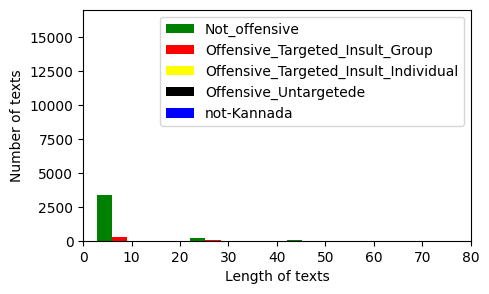

In [26]:
comments_length_per_class(train_data,'Training')

In [27]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [28]:
pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 65.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 73.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 61.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 45.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepari

In [29]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [30]:
import ktrain
from ktrain import text

In [31]:
train_data['label'].value_counts()

Not_offensive                           3543
not-Kannada                             1521
Offensive_Targeted_Insult_Individual     487
Offensive_Targeted_Insult_Group          329
Offensive_Untargetede                    212
Offensive_Targeted_Insult_Other          123
Name: label, dtype: int64

In [32]:
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

X_valid = valid_data['text'].tolist()
y_valid = valid_data['label'].tolist()

X_test = test_data['text'].tolist()
#y_test = test_data['label'].tolist()

In [33]:
categories = ['Not_offensive',
       'Offensive_Targeted_Insult_Group',
       'Offensive_Targeted_Insult_Individual', 'Offensive_Untargetede',
       'not-Kannada','Offensive_Targeted_Insult_Other']

In [34]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

In [35]:
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_valid,y_valid)
#test = trans.preprocess_test(X_test,y_test)

preprocessing train...
language: kn
train sequence lengths:
	mean : 8
	95percentile : 21
	99percentile : 41


Is Multi-Label? False
preprocessing test...
language: kn
test sequence lengths:
	mean : 8
	95percentile : 22
	99percentile : 44


In [36]:
model = trans.get_classifier()

In [37]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)


In [38]:
#learner.lr_find(show_plot = True,max_epochs=10)

In [39]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced'
                                               ,classes = np.unique(y_train)
                                               ,y = y_train)

weight = {i : class_weights[i] for i in range(6)}
weight

{0: 0.29236052309718696,
 1: 3.148429584599797,
 2: 2.126967830253251,
 3: 8.42140921409214,
 4: 4.886006289308176,
 5: 0.6810212579443349}

In [40]:
learner.fit_onecycle(2e-5,15,class_weight=weight)     #2e-5        



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/15
518/518 [==============================] - 150s 205ms/step - loss: 1.6618 - accuracy: 0.3786 - val_loss: 1.5334 - val_accuracy: 0.3866
Epoch 2/15
518/518 [==============================] - 100s 194ms/step - loss: 1.4413 - accuracy: 0.4442 - val_loss: 1.3443 - val_accuracy: 0.5026
Epoch 3/15
518/518 [==============================] - 98s 189ms/step - loss: 1.3390 - accuracy: 0.4811 - val_loss: 1.4128 - val_accuracy: 0.4665
Epoch 4/15
518/518 [==============================] - 99s 191ms/step - loss: 1.2063 - accuracy: 0.5173 - val_loss: 1.1779 - val_accuracy: 0.5451
Epoch 5/15
518/518 [==============================] - 98s 189ms/step - loss: 0.9934 - accuracy: 0.5979 - val_loss: 1.2945 - val_accuracy: 0.5052
Epoch 6/15
518/518 [==============================] - 98s 189ms/step - loss: 0.7932 - accuracy: 0.6396 - val_loss: 1.0422 - val_accuracy: 0.6456
Epoch 7/15
518/518 [==============================] - 99s 190ms/s

In [41]:
learner.validate(class_names=categories)

25/25 [==============================] - 6s 126ms/step
                                      precision    recall  f1-score   support

                       Not_offensive       0.75      0.79      0.77       426
     Offensive_Targeted_Insult_Group       0.35      0.20      0.26        44
Offensive_Targeted_Insult_Individual       0.57      0.52      0.54        66
               Offensive_Untargetede       0.38      0.19      0.25        16
                         not-Kannada       0.14      0.06      0.09        33
     Offensive_Targeted_Insult_Other       0.72      0.82      0.76       191

                            accuracy                           0.70       776
                           macro avg       0.48      0.43      0.44       776
                        weighted avg       0.67      0.70      0.68       776



array([[337,  10,  15,   5,   8,  51],
       [ 28,   9,   2,   0,   1,   4],
       [ 25,   2,  34,   0,   2,   3],
       [  9,   1,   2,   3,   0,   1],
       [ 18,   4,   6,   0,   2,   3],
       [ 33,   0,   1,   0,   1, 156]])

In [42]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [43]:
predictor.save(folder_path+'Transformers_Models'+'/ka_offensive_m-bert_cw_predictor')


In [ ]:
predictor = ktrain.load_predictor(folder_path+'Transformers_Models'+'/ka_offensive_m-bert_cw_predictor')

In [ ]:
y_pred = predictor.predict(X_test)
y_pred

In [ ]:
test_data['id'] = test_data.index+1

In [47]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = y_pred
run

,id,text,label
0,1,ಜೈ ಮೋರಿ ಜೈ ರೋಗಿ ಇಸ್ಲಾಂ ಸಾಯಿಸಿ ಇದೆ ಇವರ ಗುರಿ,Not_offensive
1,2,Anna nim e vedio nodinu mathe chaina apps use ...,Not_offensive
2,3,Super anna yenu thappila yela sari agi hellidi...,Not_offensive
3,4,Super sir super super super super,Offensive_Targeted_Insult_Other
4,5,AGT-KELU (KANNADA RAP 2019),Not_offensive
...,...,...,...
772,773,Super movie 🤩,not-Kannada
773,774,Startup start maadalu capacity growth maadalu ...,Not_offensive
774,775,Rashmika idanna nodi thi*a urkimbeku🤣🤣🤣🤣🤣,Not_offensive
775,776,I love you sir,not-Kannada


In [48]:
run['label'].value_counts()

Not_offensive                           438
not-Kannada                             216
Offensive_Targeted_Insult_Individual     68
Offensive_Targeted_Insult_Group          31
Offensive_Untargetede                    17
Offensive_Targeted_Insult_Other           7
Name: label, dtype: int64

In [49]:
run.to_csv(folder_path +'kannada_off_indic-bert_cw.csv',index = False)

Machine Learning

In [50]:
def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

In [51]:
## TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
#use_idf=True,tokenizer=lambda x: x.split()
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
vectorised_posts = vectorizer.fit_transform(train_data['cleaned'])
vectorized_train_posts = vectorizer.transform(train_data['cleaned'])
vectorized_valid_posts = vectorizer.transform(valid_data['cleaned'])
vectorized_test_posts = vectorizer.transform(test_data['cleaned'])

print("Feature Size: ", vectorized_train_posts.shape[1])
#vectorizer.vocabulary_

Feature Size:  15997


In [52]:
vectorized_valid_posts.shape

(776, 15997)

In [53]:
valid_data['enc_label'].value_counts()

0    426
1    191
2     66
4     44
3     33
5     16
Name: enc_label, dtype: int64

In [54]:
labels = ['Not_offensive',
       'Offensive_Targeted_Insult_Group',
       'Offensive_Targeted_Insult_Individual',
       'Offensive_Targeted_Insult_Other', 'Offensive_Untargetede',
       'not-Kannada']
def actual_label(row):
    return labels[row]

Logistic Regression

In [55]:
# After Tunning
# Optimum C = 100 
lr = LogisticRegression(C=10,class_weight='balanced')
lr.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = lr.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

[[310  26  17  17  14   9]
 [ 69 157   5   6   7   2]
 [ 16   5  37   2   7   1]
 [  7   1   2   4   3   1]
 [ 18   1   4   4  12   3]
 [  6   1   1   0   1   0]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       393
           1       0.82      0.64      0.72       246
           2       0.56      0.54      0.55        68
           3       0.12      0.22      0.16        18
           4       0.27      0.29      0.28        42
           5       0.00      0.00      0.00         9

    accuracy                           0.67       776
   macro avg       0.42      0.41      0.41       776
weighted avg       0.70      0.67      0.68       776

Accuracy :  0.6701030927835051
Precison :  0.695815612544205
Recall :  0.6701030927835051
F1 :  0.6783061615462733


In [ ]:
test_pred = lr.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [57]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,ಜೈ ಮೋರಿ ಜೈ ರೋಗಿ ಇಸ್ಲಾಂ ಸಾಯಿಸಿ ಇದೆ ಇವರ ಗುರಿ,Not_offensive
1,2,Anna nim e vedio nodinu mathe chaina apps use ...,Not_offensive
2,3,Super anna yenu thappila yela sari agi hellidi...,Not_offensive
3,4,Super sir super super super super,Offensive_Targeted_Insult_Group
4,5,AGT-KELU (KANNADA RAP 2019),Not_offensive
...,...,...,...
772,773,Super movie 🤩,Offensive_Targeted_Insult_Group
773,774,Startup start maadalu capacity growth maadalu ...,Not_offensive
774,775,Rashmika idanna nodi thi*a urkimbeku🤣🤣🤣🤣🤣,Offensive_Targeted_Insult_Individual
775,776,I love you sir,Offensive_Targeted_Insult_Group


In [ ]:
run.to_csv(folder_path +'kannada_off_lr.csv',index = False)

Support Vector Machine

In [59]:
## SVM
from sklearn.svm import SVC
svc =  SVC(kernel='linear', C = 5,random_state=1234,class_weight='balanced')
svc.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = svc.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

[[328  29  27  19  23  11]
 [ 74 158   6   5   7   1]
 [  9   2  31   3   4   2]
 [  5   1   1   3   2   0]
 [  8   0   1   3   8   2]
 [  2   1   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       437
           1       0.83      0.63      0.71       251
           2       0.47      0.61      0.53        51
           3       0.09      0.25      0.13        12
           4       0.18      0.36      0.24        22
           5       0.00      0.00      0.00         3

    accuracy                           0.68       776
   macro avg       0.39      0.43      0.40       776
weighted avg       0.74      0.68      0.70       776

Accuracy :  0.6804123711340206
Precison :  0.7385933582048104
Recall :  0.6804123711340206
F1 :  0.7030769367705199


In [60]:
test_pred = svc.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [62]:
run.to_csv(folder_path +'kannada_off_svm.csv',index = False)


Ensemble Approach (Logistic Regression, Decision Tree, Random Forest)

In [63]:
LogReg_clf = LogisticRegression(class_weight='balanced')
DTree_clf = DecisionTreeClassifier(class_weight='balanced')
rt_clf =   RandomForestClassifier(class_weight='balanced')
SVC_clf = SVC(class_weight='balanced')


voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf),('RF', rt_clf)], voting='hard')
voting_clf.fit(vectorized_train_posts, train_data['enc_label'])
preds = voting_clf.predict(vectorized_valid_posts)


In [ ]:
print_metrices(valid_data['enc_label'],preds)

In [ ]:
test_pred = voting_clf.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv(folder_path +'kannada_off_voting.csv',index = False)

LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
print("Tensorflow Version:--",tf.version.VERSION)
print("Keras Version:---",keras.__version__)

In [ ]:
tokenizer = Tokenizer(num_words = 20000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
tokenizer.fit_on_texts(train_data['text'])  
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [ ]:
print(vocab_size)

In [ ]:
max_len = 50
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(valid_data['text'])
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced'
                                               ,classes = np.unique(y_train)
                                               ,y = y_train)

weight = {i : class_weights[i] for i in range(6)}
weight

In [ ]:
num_classes = 6

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folder_path+"ka_off_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 100, input_length = max_len),
tf.keras.layers.Conv1D(128, 5, activation='relu'),
tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 100,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(6 , activation='softmax')])

model.summary()

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=15,
    batch_size = 64,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

In [ ]:
# Load the saved model
model = load_model(folder_path+'ka_off_BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)

print("F1-Score:",f1_score(valid_data['enc_label'],y_pred,average = 'weighted')*100)
print("Accuracy:",accuracy_score(valid_data['enc_label'],y_pred)*100)

In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
print_metrices(valid_data['enc_label'],y_pred)

In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()
test_pred

In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [80]:
run.to_csv(folder_path +'kannada_bilstm.csv',index = False)